## This notebook demonstrates how poorly a model will perform if it was only trained on one type of font. 

## In this case, use a model which was only trained to recognize the 'DejaVuSansMono' font and see how it performs on CAPTCHAs using 'OpenSans-Italic'

In [1]:
# functions from other notebook file
from ipynb.fs.full.shared_functions import *

import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pyplot
import os

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/OpenSans-Italic')
BATCH_SIZE = 128

In [5]:
model = models.load_model('my_model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0     

In [6]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,8946,/home/t-visor/repositories/captcha-tensorflow/...
1,4378,/home/t-visor/repositories/captcha-tensorflow/...
2,0266,/home/t-visor/repositories/captcha-tensorflow/...
3,3254,/home/t-visor/repositories/captcha-tensorflow/...
4,8852,/home/t-visor/repositories/captcha-tensorflow/...


In [7]:
shuffled_indices = numpy.random.permutation(len(data_frame))
print('Test set:', len(shuffled_indices))

Test set: 6353


In [8]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, steps=len(shuffled_indices)//128)))

49/49 [==============================] - 6s 91ms/step - loss: 5.3916 - accuracy: 0.2531


{'loss': 5.391552448272705, 'accuracy': 0.2530691921710968}

In [9]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

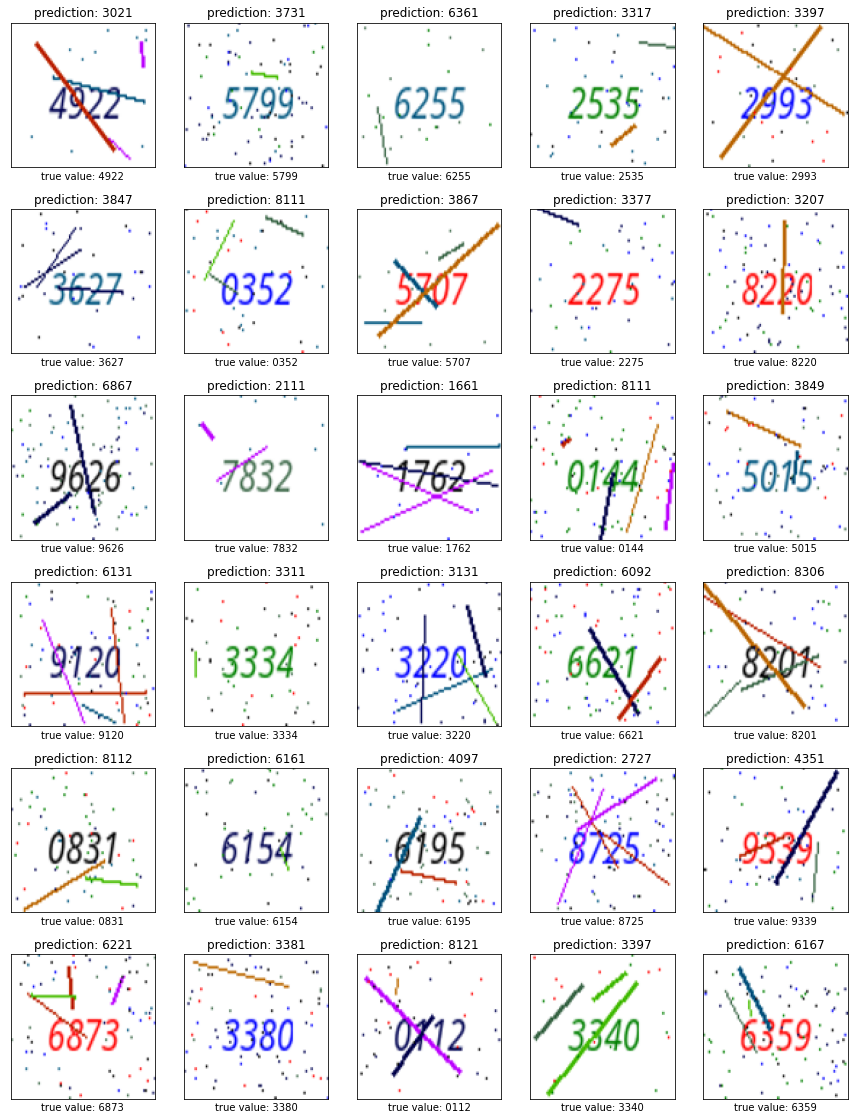

In [10]:
display_predictions_from_model(captcha_images, predictions, true_values)